To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 4 - Logistic Regression with Regularization

## 4.1

**Answer:**

The parameter C represents the inverse of regularization strength. Smaller values of C indicate a stronger regularization which encourages model simlipicity therefore reducing over fitting. A bigger C allows for more complexity and therefore closer model fitting. The value can range from close to zero, such as 0.001, and up to large numbers such as 1,000.

Solver is the parameter for the optimization algorithm for fitting the linear model. Different solvers have different characterstics and will be better for different types of problems. For example: 'newton-cg' is good for small data sets, 'liblinear' the 'library for large linear classification' which can be used on many size sets and supports Lasso and Ridge regularization.

Penalty term is the parameter to specify the type of regularization used on the logistic regression. This works to add a penalty term to the loss function, either L1(Lasso) or L2(Ridge).

The multi class parameter specifies how the regression handles classificatoin problems (when there are more than two classes). 'ovr': One-vs-Rest is the default that creates a binary classifier for each class. 'multinomial' is meant for mutliclass problems and directly learns the probabilities of each class.

## 4.2

**Answer:**

L1 penalty is Lasso regularization. It adds the absolute values of the coeffeciient of the predictor variables and adds it to the loss function. This encourages the model to have coefficients that are exactly zero. This is helpful when some features may be redundant and can help with feature selection.

L2 pentalty is ridge regularization adds the squared values of the coefficients as penalty terms to the loss function. It penalizes large coefficents, encouraging them to reduce close to zero without ever becoming zero. This is helpful for adressing multicolinearity.

## 4.3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
np.random.seed(400)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


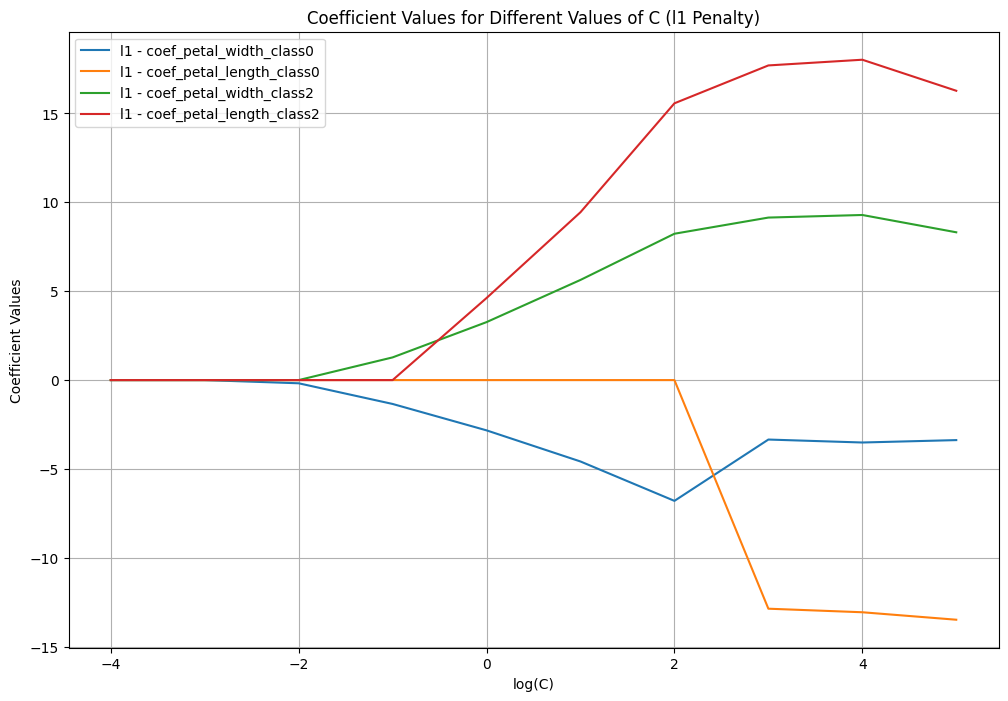

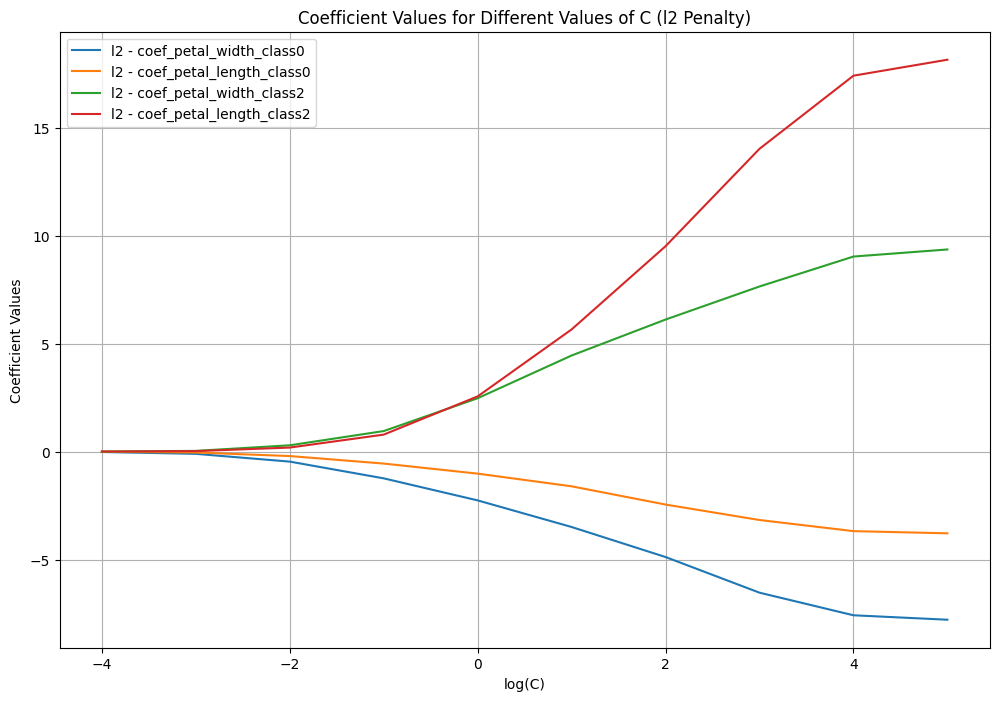

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the values of C and penalties
C_values = [10**(-4), 10**(-3), 10**(-2), 10**(-1), 1, 10, 100, 1000, 10000, 100000]
penalties = ['l1', 'l2']

# Initialize dictionaries to store coefficients
coefficients_l1 = {}
coefficients_l2 = {}

# Fit logistic regression models for different values of C and penalties
for penalty in penalties:
    coefficients_l1[penalty] = {'coef_petal_width_class0': [], 'coef_petal_length_class0': [],
                               'coef_petal_width_class2': [], 'coef_petal_length_class2': []}
    coefficients_l2[penalty] = {'coef_petal_width_class0': [], 'coef_petal_length_class0': [],
                               'coef_petal_width_class2': [], 'coef_petal_length_class2': []}

    for C in C_values:
        model = LogisticRegression(C=C, penalty=penalty, multi_class='ovr', solver='liblinear')
        model.fit(X, y)

        # Collect coefficients for class 0 and class 2
        coefficients = {
            'coef_petal_width_class0': model.coef_[0][2],
            'coef_petal_length_class0': model.coef_[0][3],
            'coef_petal_width_class2': model.coef_[2][2],
            'coef_petal_length_class2': model.coef_[2][3]
        }

        if penalty == 'l1':
            for key, value in coefficients.items():
                coefficients_l1[penalty][key].append(value)
        elif penalty == 'l2':
            for key, value in coefficients.items():
                coefficients_l2[penalty][key].append(value)

# Create plots for 'l1' penalty
plt.figure(figsize=(12, 8))
for key, coef_data in coefficients_l1['l1'].items():
    plt.plot(np.log10(C_values), coef_data, label=f'l1 - {key}')

plt.xlabel('log(C)')
plt.ylabel('Coefficient Values')
plt.legend()
plt.title('Coefficient Values for Different Values of C (l1 Penalty)')
plt.grid(True)
plt.show()

# Create plots for 'l2' penalty
plt.figure(figsize=(12, 8))
for key, coef_data in coefficients_l2['l2'].items():
    plt.plot(np.log10(C_values), coef_data, label=f'l2 - {key}')

plt.xlabel('log(C)')
plt.ylabel('Coefficient Values')
plt.legend()
plt.title('Coefficient Values for Different Values of C (l2 Penalty)')
plt.grid(True)
plt.show()


**Answer:**

As c increases class 2 coefficients increase but class 0's coefficients decrease.

## 4.4

<ipython-input-32-1d8c5f54a1b3>:48: RuntimeWarning: invalid value encountered in double_scalars
  l2_ratio = np.linalg.norm(model.coef_) / np.linalg.norm(model.coef_[0])
<ipython-input-32-1d8c5f54a1b3>:48: RuntimeWarning: invalid value encountered in double_scalars
  l2_ratio = np.linalg.norm(model.coef_) / np.linalg.norm(model.coef_[0])
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


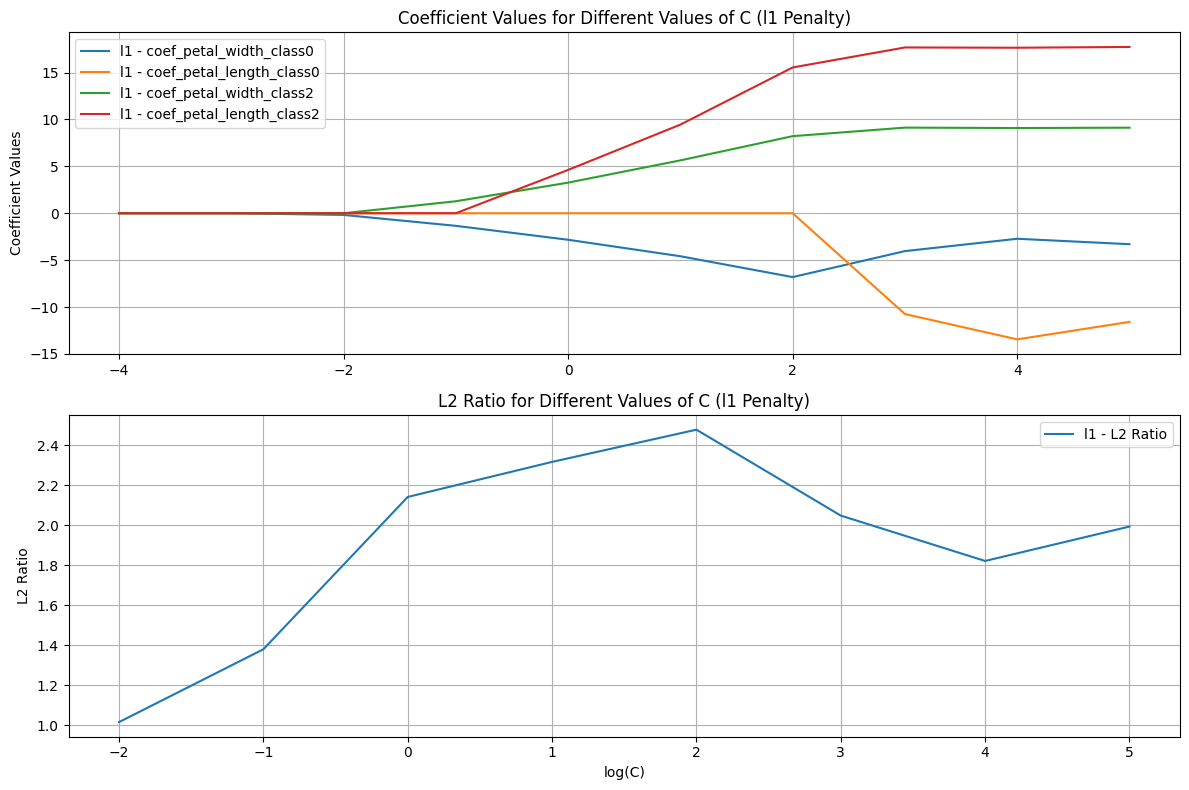

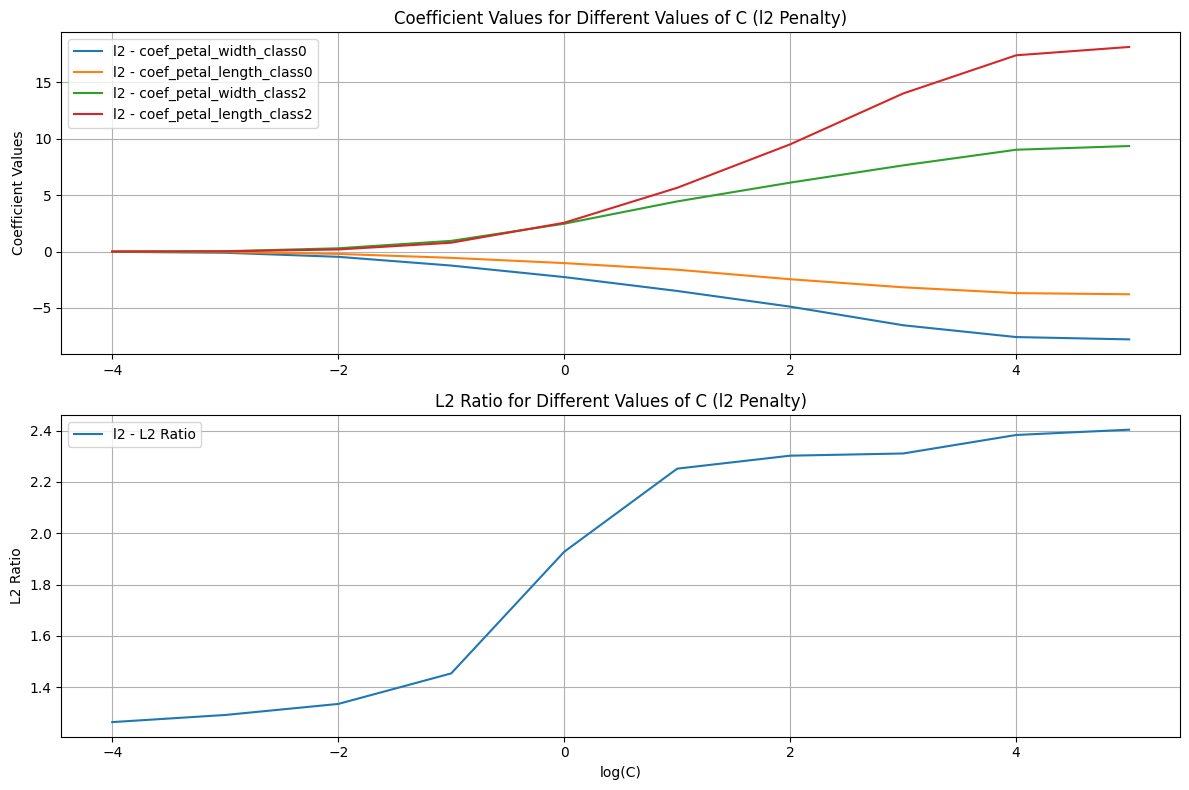

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the values of C and penalties
C_values = [10**(-4), 10**(-3), 10**(-2), 10**(-1), 1, 10, 100, 1000, 10000, 100000]
penalties = ['l1', 'l2']

# Initialize dictionaries to store coefficients and L2 ratios
coefficients_l1 = {}
coefficients_l2 = {}
l2_ratios = {}

# Fit logistic regression models for different values of C and penalties
for penalty in penalties:
    coefficients_l1[penalty] = {'coef_petal_width_class0': [], 'coef_petal_length_class0': [],
                               'coef_petal_width_class2': [], 'coef_petal_length_class2': []}
    coefficients_l2[penalty] = {'coef_petal_width_class0': [], 'coef_petal_length_class0': [],
                               'coef_petal_width_class2': [], 'coef_petal_length_class2': []}
    l2_ratios[penalty] = []

    for C in C_values:
        model = LogisticRegression(C=C, penalty=penalty, multi_class='ovr', solver='liblinear')
        model.fit(X, y)

        # Collect coefficients for class 0 and class 2
        coefficients = {
            'coef_petal_width_class0': model.coef_[0][2],
            'coef_petal_length_class0': model.coef_[0][3],
            'coef_petal_width_class2': model.coef_[2][2],
            'coef_petal_length_class2': model.coef_[2][3]
        }

        if penalty == 'l1':
            for key, value in coefficients.items():
                coefficients_l1[penalty][key].append(value)
        elif penalty == 'l2':
            for key, value in coefficients.items():
                coefficients_l2[penalty][key].append(value)

        # Calculate the L2 norm ratio
        l2_ratio = np.linalg.norm(model.coef_) / np.linalg.norm(model.coef_[0])
        l2_ratios[penalty].append(l2_ratio)

# Create plots for 'l1' penalty
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
for key, coef_data in coefficients_l1['l1'].items():
    plt.plot(np.log10(C_values), coef_data, label=f'l1 - {key}')

plt.ylabel('Coefficient Values')
plt.legend()
plt.title('Coefficient Values for Different Values of C (l1 Penalty)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(np.log10(C_values), l2_ratios['l1'], label='l1 - L2 Ratio')
plt.xlabel('log(C)')
plt.ylabel('L2 Ratio')
plt.legend()
plt.title('L2 Ratio for Different Values of C (l1 Penalty)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Create plots for 'l2' penalty
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
for key, coef_data in coefficients_l2['l2'].items():
    plt.plot(np.log10(C_values), coef_data, label=f'l2 - {key}')

plt.ylabel('Coefficient Values')
plt.legend()
plt.title('Coefficient Values for Different Values of C (l2 Penalty)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(np.log10(C_values), l2_ratios['l2'], label='l2 - L2 Ratio')
plt.xlabel('log(C)')
plt.ylabel('L2 Ratio')
plt.legend()
plt.title('L2 Ratio for Different Values of C (l2 Penalty)')
plt.grid(True)

plt.tight_layout()
plt.show()


**Answer:**

As c increases for L1 the ratio decreases then increases but L1 it just increases.